# line 股票 bot


## 申請 line developer trial
- 沒申請也ok，只是沒有推送功能可用
- developer trial只可以有50個好友

### 目前由中文官方網頁申請 line@帳號開啟API預設沒有developer trial項可以選  
要改由 https://developers.line.me/en/ 進去申請才行  
如此頁面的介紹： http://at-blog.line.me/tw/create_developer_trial

- 申請結束，要把「Channel secret」、「Channel access token」複製到程式中，此為收送訊息需要的
- 接著編輯「Use webhooks」欄位，改為「Enabled」
- 加入「Webhook URL」，以我的為例為「mybot.herokuapp.com/callback_yangbot8」
- 「Auto-reply messages」改為disable
- 掃一下這一個line-bot的bar-code，把它加入好友
  
- 接著參考這一篇打造一個echo bot:  
  https://github.com/line/line-bot-sdk-python/tree/master/examples/flask-echo
- line API的參考文件：  
  https://developers.line.me/en/docs/messaging-api/reference/#image
- 測試會動了之後，請在程式中69~73行改為加入這一段，為主動發送訊息的測試做準備

In [ ]:
#原來：
        line_bot_api.reply_message(
            event.reply_token,
            TextSendMessage(text=event.message.text)
        )
#改為：
        text=event.message.text
        #userId = event['source']['userId']
        if(text.lower()=='me'):
            content = str(event.source.user_id)

            line_bot_api_8.reply_message(
                event.reply_token,
                TextSendMessage(text=content)
            )
        else:
            line_bot_api_8.reply_message(
                event.reply_token,
                TextSendMessage(text=text)
            )            

In [1]:
# 測試一下 Line-bot-sdk 的主動推播訊息
# pip install line-bot-sdk

#- push message test
from linebot import (
    LineBotApi, WebhookParser
)
from linebot.exceptions import (
    InvalidSignatureError
)
from linebot.models import *

channel_secret = 'your channel_secret'
channel_access_token = 'your channel_access_token'
line_bot_api = LineBotApi(channel_access_token)
#push message to one user
user_id = 'your user_id'
line_bot_api.push_message(user_id, 
    TextSendMessage(text='Hello World!'))


## 取得股票資訊
- 使用twstock套件



In [7]:
# 要先安裝twstock
# pip install twstock

import twstock
stock = twstock.Stock('2330')

In [8]:
stock

In [4]:
# Stock 預設建立時會取得近 31 日開盤之資料
print('high', stock.date[-5:])    # 近五日
print('price', stock.price[-5:])  # 近五日之收盤價
print('high', stock.high[-5:])    # 近五日之盤中高點

high [datetime.datetime(2017, 11, 8, 0, 0), datetime.datetime(2017, 11, 9, 0, 0), datetime.datetime(2017, 11, 10, 0, 0), datetime.datetime(2017, 11, 13, 0, 0), datetime.datetime(2017, 11, 14, 0, 0)]
price [242.5, 241.0, 240.5, 239.5, 240.0]
high [243.5, 243.0, 242.0, 241.5, 241.0]


In [6]:
#先 pip install pandas
import pandas as pd

In [9]:
stock = twstock.Stock('2330')
data = stock.fetch(2017, 11)
df = pd.DataFrame.from_dict(data)

In [10]:
df

,date,capacity,turnover,open,high,low,close,change,transaction
0,2017-11-01,20465054,4975624502,243.5,245.0,241.5,242.5,-0.5,6464
1,2017-11-02,16309342,3940181714,242.0,242.5,240.5,241.0,-1.5,5912
2,2017-11-03,18327682,4386122470,240.5,241.0,238.5,239.0,-2.0,5621
3,2017-11-06,21029515,5063670900,243.5,244.0,239.0,239.5,0.5,6601
4,2017-11-07,21689261,5266500464,242.0,244.0,241.5,244.0,4.5,6729
5,2017-11-08,14579103,3536455029,243.0,243.5,242.0,242.5,-1.5,4610
6,2017-11-09,21366949,5151628572,240.5,243.0,240.0,241.0,-1.5,6339
7,2017-11-10,15061296,3629826936,240.0,242.0,239.5,240.5,-0.5,4465
8,2017-11-13,12087858,2904559294,240.0,241.5,239.5,239.5,-1.0,4288
9,2017-11-14,17229176,4132433432,241.0,241.0,239.0,240.0,0.5,4130


# 即時股價

In [5]:
stock_rt = twstock.realtime.get('2002')

In [6]:
stock_rt

{'info': {'channel': '2002.tw',
  'code': '2002',
  'fullname': '中國鋼鐵股份有限公司',
  'name': '中鋼',
  'time': '2017-11-16 00:47:05'},
 'realtime': {'accumulate_trade_volume': '0',
  'best_ask_price': ['24.35', '24.40', '24.45', '24.50', '24.55'],
  'best_ask_volume': ['12', '105', '29', '40', '35'],
  'best_bid_price': ['24.30', '24.25', '24.20', '24.15', '24.10'],
  'best_bid_volume': ['129', '122', '330', '42', '155'],
  'high': None,
  'latest_trade_price': None,
  'low': None,
  'open': None,
  'trade_volume': '0'},
 'success': True,
 'timestamp': 1510793225.0}

In [13]:
# 最新股價
stock_rt['realtime']['latest_trade_price']

'237.00'

In [9]:
stock_rt = twstock.realtime.get('2002')

In [10]:
stock_rt

{'info': {'channel': '2002.tw',
  'code': '2002',
  'fullname': '中國鋼鐵股份有限公司',
  'name': '中鋼',
  'time': '2017-11-16 00:58:57'},
 'realtime': {'accumulate_trade_volume': '0',
  'best_ask_price': ['24.35', '24.40', '24.45', '24.50', '24.55'],
  'best_ask_volume': ['11', '168', '28', '44', '54'],
  'best_bid_price': ['24.30', '24.25', '24.20', '24.15', '24.10'],
  'best_bid_volume': ['28', '221', '362', '69', '177'],
  'high': None,
  'latest_trade_price': None,
  'low': None,
  'open': None,
  'trade_volume': '0'},
 'success': True,
 'timestamp': 1510793937.0}

In [13]:
from datetime import datetime
dt = datetime.fromtimestamp(stock_rt['timestamp'])
dt.strftime('%Y-%m-%d %H:%M:%S')

'2017-11-16 00:58:57'

In [14]:
my_datetime = datetime.fromtimestamp(stock_rt['timestamp']+8*60*60)
my_datetime.strftime('%Y-%m-%d %H:%M:%S')

'2017-11-16 08:58:57'

## 開始分析吧!~


In [3]:
# pip install twstock pandas matplotlib pymongo

%pylab inline
import twstock
import pandas as pd

stock = twstock.Stock('2002')
data = stock.fetch(2017, 1)
df = pd.DataFrame.from_dict(data)

for m in range(2, 12):
    data = stock.fetch(2017, m)
    df_tmp = pd.DataFrame.from_dict(data)
    df = df.append(df_tmp)

df = df.set_index('date')
df

Populating the interactive namespace from numpy and matplotlib


,capacity,turnover,open,high,low,close,change,transaction
date,,,,,,,,
2017-01-03,14961849,365462923,24.70,24.75,24.25,24.45,-0.20,4911
2017-01-04,10592717,260810702,24.60,24.70,24.50,24.70,0.25,4193
2017-01-05,14779701,366064615,24.65,24.95,24.55,24.85,0.15,4892
2017-01-06,11881341,294043344,25.00,25.00,24.65,24.70,-0.15,3820
2017-01-09,10175549,250850308,24.60,25.00,24.55,24.55,-0.15,4145
2017-01-10,8124411,199532377,24.55,24.70,24.50,24.55,0.00,3138
2017-01-11,22456464,561663240,24.90,25.20,24.90,25.05,0.50,7344
2017-01-12,23508819,591859275,25.05,25.35,25.00,25.10,0.05,7750
2017-01-13,14070055,352797625,25.10,25.20,24.95,25.15,0.05,5742


## 來個基本的BBand吧

Populating the interactive namespace from numpy and matplotlib
buy point: 13
sell point: 7


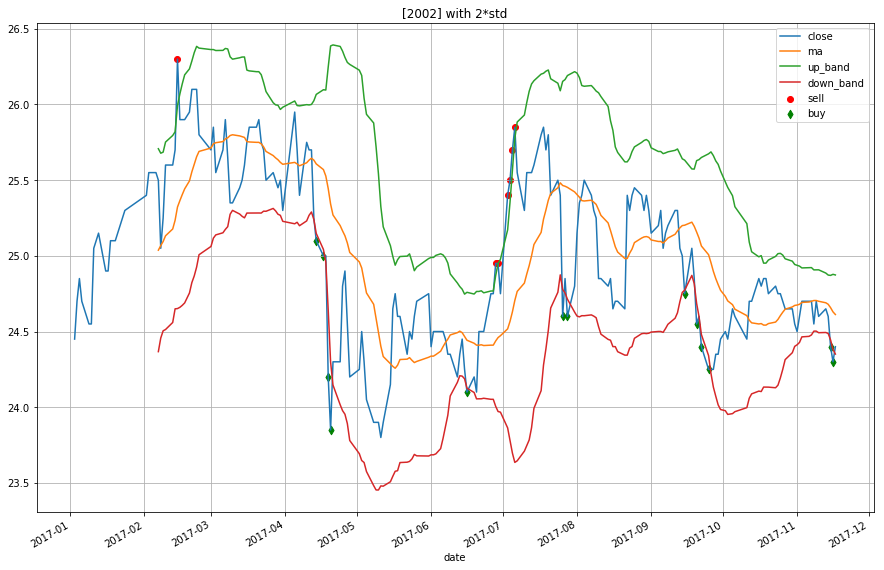

In [4]:
# pip install twstock pandas matplotlib
%pylab inline
import twstock
import pandas as pd

n_day_ma = 20

df['ma'] = df['close'].rolling(window=n_day_ma).mean()
df['std'] = df['close'].rolling(window=n_day_ma).std()
df['up_band'] = df['ma']+df['std']*2
df['down_band'] = df['ma']-df['std']*2

# 買點
chk_b1 = df['close']<df['down_band']
b1 = df[chk_b1]
print('buy point:', len(b1))
#b1

# 賣點
chk_s1 = df['close']>df['up_band']
s1 = df[chk_s1]
print('sell point:', len(s1))
#s1

df[['close', 'ma', 'up_band', 'down_band']].plot(grid = True, figsize=[15,10])

# 點出買賣點
l1 = plt.scatter(s1.index, s1['close'], marker='o', color='red', label='sell')
l2 = plt.scatter(b1.index, b1['close'], marker='d', color='green', label='buy')

plt.title('[%s] with 2*std' %(stock.sid))
plt.legend()

plt.show()

# **發佈app到Heroku的補充教材
  --> 如果有人不知道怎麼發佈，可以參考一下

- 新增一個app  
![Imgur](https://i.imgur.com/UnADtKg.png)

- 填入project anme
![Imgur](https://i.imgur.com/zPsv9DG.png)


- 設定要用dropbox
![Imgur](https://i.imgur.com/GklIaFq.png)

- 連接
![Imgur](https://i.imgur.com/qLsxpn4.png)


- heroku會在dropbox上建一個資料夾，拉進去就好
![Imgur](https://i.imgur.com/z6t4kkN.png)


- 發佈
![Imgur](https://i.imgur.com/DKwlXLp.png)
- 發佈過程圖片
![Imgur](https://i.imgur.com/VNS7sEh.png)


- 發佈完，點一下open，看是否正常運作
![Imgur](https://i.imgur.com/LtfnnT7.png)
- 看來是ok了
![Imgur](https://i.imgur.com/GePSeee.png)


- 在Heroku中的Settings中可以看到你的網址 or 剛剛的open頁面也有
![Imgur](https://i.imgur.com/5YcFQnl.png)


- 因為我們的webhook的callback function是在/callback_bot8，所以如圖
![Imgur](https://i.imgur.com/fKbzkAB.png)


